In [27]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [28]:
def plot(axes, x, y, title, label=None, semilog=False):
    f = axes.semilogy if semilog else axes.plot
    f(x, y, linestyle='', marker='.', markersize=6, label=label)
    axes.set_title(title)
    # axes.set_ylabel(title)
    axes.set_xlabel('kT')


In [29]:
from importlib import reload
try:
    reload(recopilar_data)
except NameError:
    import recopilar_data

    
# data = pd.read_csv('alldata.dat', sep='\s+')
data_raw = pd.read_csv('alldata.dat', sep='\s+')
data_raw2 = pd.read_csv('alldata2.dat', sep='\s+')

# data_raw['amag'] = abs(data_raw['magnetization'])

data_raw.head(10)

,size,B,temperature,job,energy,energy^2,magnetization,magnetization^2,aceptados
0,40,0.0,2.94,2,-1347.663468,1.822371e+06,-14.225848,22428.021753,0.448086
1,40,0.0,2.94,10,-1345.506078,1.816166e+06,0.535509,20068.779271,0.448709
2,40,0.0,2.94,9,-1348.083173,1.822863e+06,13.943058,19230.048624,0.448198
3,40,0.0,2.94,3,-1348.307102,1.823760e+06,18.236724,21631.483045,0.447750
4,40,0.0,2.94,7,-1354.497761,1.840730e+06,30.110685,24728.574536,0.446440
5,40,0.0,2.94,5,-1346.484965,1.819129e+06,-11.435701,18780.967370,0.448179
6,40,0.0,2.94,4,-1346.314779,1.818169e+06,5.663468,20002.812540,0.448745
7,40,0.0,2.94,1,-1348.222649,1.823506e+06,9.527191,19661.953935,0.447648
8,40,0.0,2.94,8,-1350.904671,1.831084e+06,19.901472,23388.127959,0.447162
9,40,0.0,2.94,6,-1347.570058,1.821839e+06,-10.078695,24339.985925,0.448234


<AxesSubplot:>

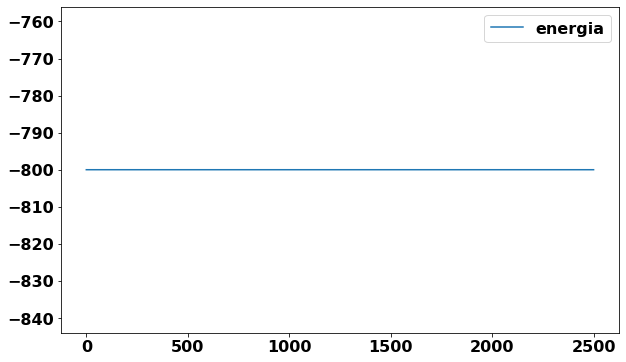

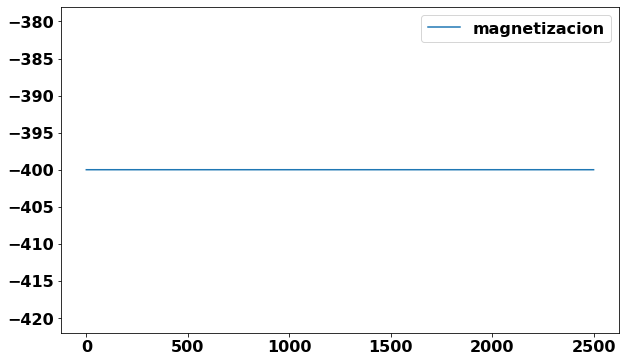

In [30]:
size = 20
B = 0.0
temperature = 0.1
job = 1
output_file = f'./data2/{size}_size/{B:.3}_B/{temperature:.3}_temp/{job:02}_JOB/output.dat'

run_data = pd.read_csv(output_file, sep='\s+' , names=['energia', 'magnetizacion'])
run_data.head()

run_data.plot(y=['energia'], figsize=(10, 6))
run_data.plot(y=['magnetizacion'], figsize=(10, 6))

In [31]:
# df = data_raw[data_raw['size'] == 100]
# df.plot(x='temperature', y='magnetization', linestyle='',marker='.', markersize=3, label='')

In [32]:
def calc_magnitudes(data_raw):
    data = data_raw.groupby(['size','temperature', 'B']).agg(
        {'energy':['mean', 'var'],
        'energy^2':['mean', 'var'],
        'magnetization':['mean', 'var'],
        'magnetization^2':['mean', 'var'],
        'aceptados':'mean',}
    ).reset_index()#.drop('job', axis=1)
    data['N'] = data['size']**2
    data['Cv'] = (data['energy^2', 'mean']-data['energy', 'mean']**2)/(data['temperature']**2*data['N'])
    data['X'] = (data['magnetization^2', 'mean']-data['magnetization', 'mean']**2)/data['temperature']#*data['N']
    data['E'] = data['energy', 'mean'] / data['N']
    data['M'] = data['magnetization', 'mean'] / data['N']
    return data

data = calc_magnitudes(data_raw)
data2 = calc_magnitudes(data_raw2)

# data.loc[120:130]


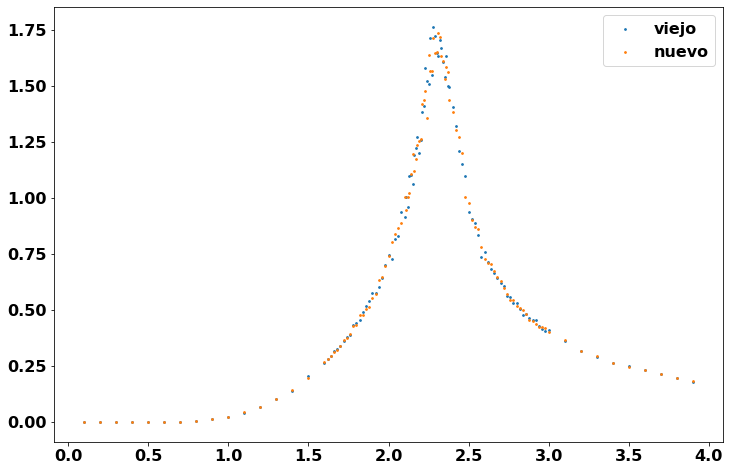

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.scatter(data[data['size']==20].temperature, data[data['size']==20].Cv, label='viejo', s=3)
ax.scatter(data2.temperature, data2.Cv, label='nuevo', s=3)
ax.legend()

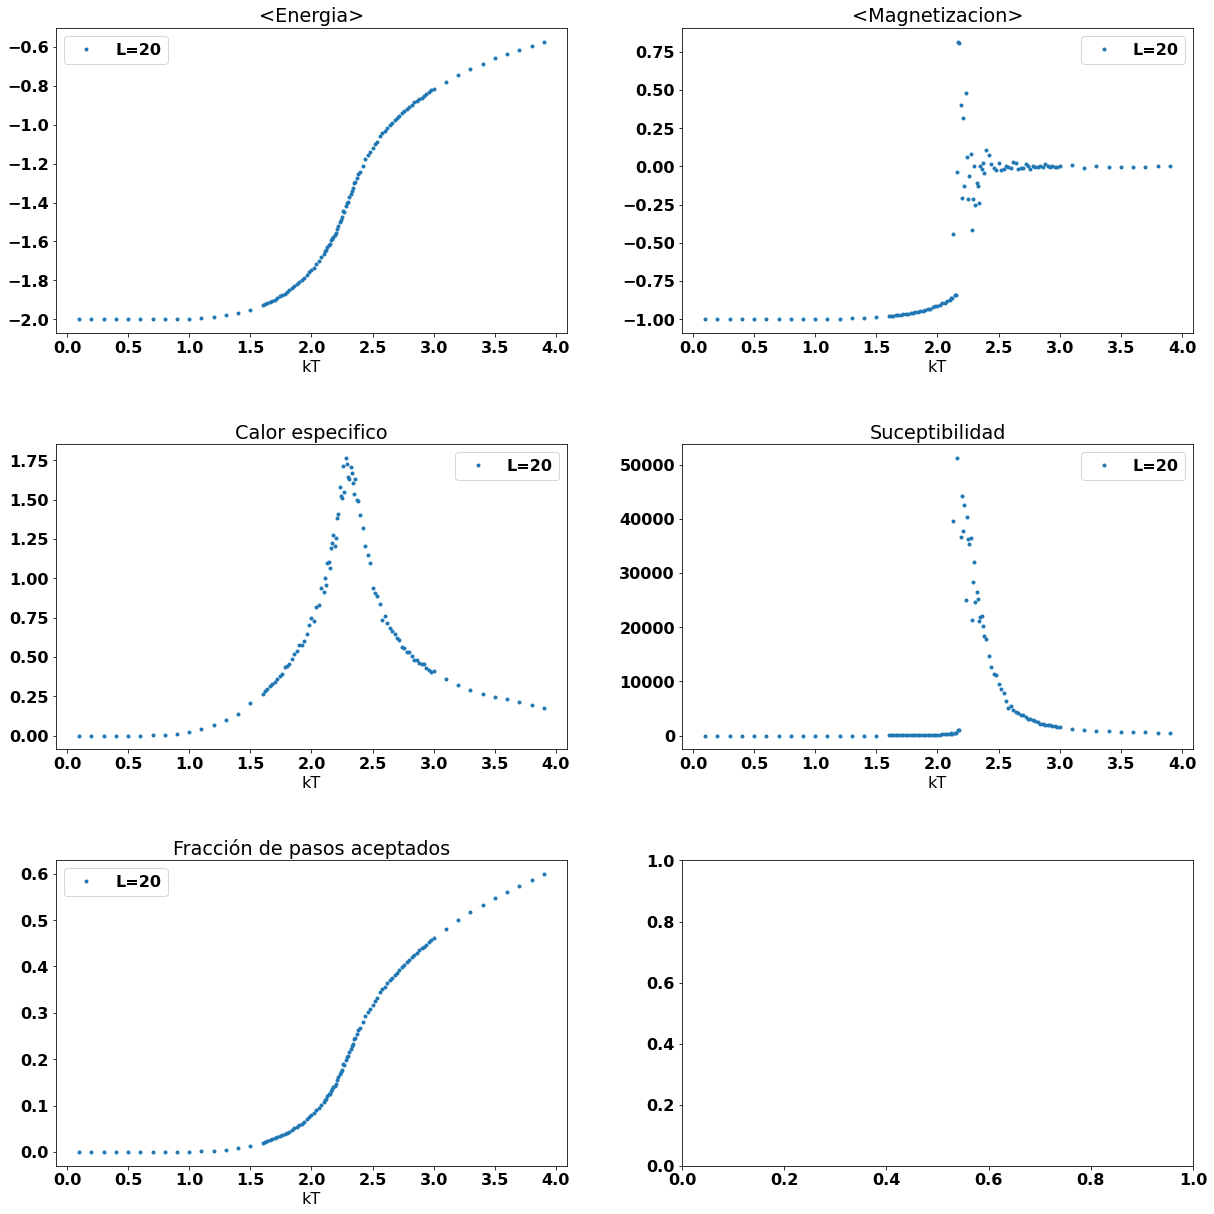

In [34]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2)
fig.set_size_inches(18, 18)
for s in [20]: #data['size'].unique():
    dataf = data[(data['size']==s) & (data['B']==0.0)]
    
    plot(ax2, dataf['temperature'], dataf['M'], '<Magnetizacion>', label=f'L={s}')
    plot(ax1, dataf['temperature'], dataf['E'], '<Energia>', label=f'L={s}')
    plot(ax3, dataf['temperature'], dataf['Cv'], 'Calor especifico', label=f'L={s}')
    plot(ax4, dataf['temperature'], dataf['X'], 'Suceptibilidad', label=f'L={s}')
    plot(ax5, dataf['temperature'], dataf['aceptados'], 'Fracción de pasos aceptados', label=f'L={s}')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
# ax3.set_ylim(0,2)
fig.tight_layout(pad=3.0)
plt.show()